<a href="https://colab.research.google.com/github/Kunal2703/-LGMVIP-DataScience-intern-work/blob/main/Exploratory_Data_Analysis_on_Dataset_Terrorism_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTERMEDIATE LEVEL TASK**

**TASK-1 - Exploratory Data Analysis on Dataset - Terrorism**

As a security/defense analyst, try to find out the hot zone of terrorism.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [18]:
data = pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding='latin1')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,31,33,60,62,76,79,94,96,114,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [19]:
data.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9.0,-9.0,0.0,-9.0,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9.0,-9.0,0.0,-9.0,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0.0,0.0,0.0,0.0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0.0,0.0,0.0,0.0,NaN


In [20]:
data.columns.values


array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [26]:
data.rename(columns={'eventid':'Events','iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [28]:
data = data[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]


In [29]:
data.head(10)


,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN
5,1970,1,1,United States,Illinois,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment
6,1970,1,2,Uruguay,Montevideo,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,Juan Maria de Lucah/Chief of Directorate of in...,NaN,Tupamaros (Uruguay),Police,Firearms,NaN
7,1970,1,2,United States,California,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,Edes Substation,1/2/1970: Unknown perpetrators detonated explo...,Unknown,Utilities,Explosives,NaN
8,1970,1,2,United States,Wisconsin,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...","1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft
9,1970,1,3,United States,Wisconsin,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,Selective Service Headquarters in Madison Wisc...,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft


In [30]:
data.shape


(21146, 18)

In [31]:
data.isnull().sum()


Year              0
Month             0
day               0
Country           0
State            95
Region            0
City              0
latitude        908
longitude       908
Attacktype        0
kill           4105
Wound          5726
target1         212
summary       20168
Group             0
Targettype        0
Weapon            0
motive        20437
dtype: int64

In [32]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21146 entries, 0 to 21145
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        21146 non-null  int64  
 1   Month       21146 non-null  int64  
 2   day         21146 non-null  int64  
 3   Country     21146 non-null  object 
 4   State       21051 non-null  object 
 5   Region      21146 non-null  object 
 6   City        21146 non-null  object 
 7   latitude    20238 non-null  float64
 8   longitude   20238 non-null  float64
 9   Attacktype  21146 non-null  object 
 10  kill        17041 non-null  float64
 11  Wound       15420 non-null  float64
 12  target1     20934 non-null  object 
 13  summary     978 non-null    object 
 14  Group       21146 non-null  object 
 15  Targettype  21146 non-null  object 
 16  Weapon      21146 non-null  object 
 17  motive      709 non-null    object 
dtypes: float64(4), int64(3), object(11)
memory usage: 2.9+ MB


In [33]:

data.describe()


,Year,Month,day,latitude,longitude,kill,Wound
count,21146.000000,21146.000000,21146.000000,20238.000000,2.023800e+04,17041.000000,15420.000000
mean,1979.026435,6.281708,15.185047,24.898481,-4.290513e+03,1.931694,1.478923
std,3.542067,3.478263,8.951616,23.173912,6.058321e+05,8.940342,10.297974
min,1970.000000,0.000000,0.000000,-51.692214,-8.618590e+07,0.000000,0.000000
25%,1977.000000,3.000000,7.000000,13.595253,-8.626701e+01,0.000000,0.000000
50%,1980.000000,6.000000,15.000000,32.010941,-7.649053e+00,0.000000,0.000000
75%,1982.000000,9.000000,23.000000,42.815372,9.174508e+00,1.000000,0.000000
max,1986.000000,12.000000,31.000000,64.837778,1.726362e+02,422.000000,700.000000


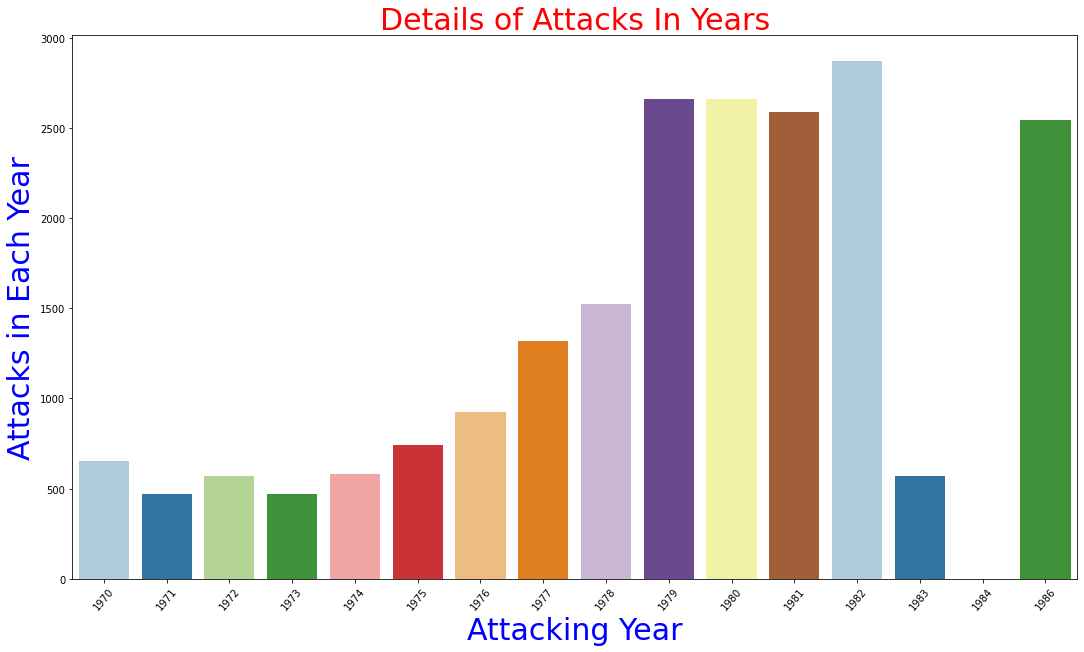

In [50]:
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year, y = years_count, palette = "Paired")
plt.title('Details of Attacks In Years',fontsize=30, color='red')
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=30,color='Blue')
plt.ylabel('Attacks in Each Year',fontsize=30,color='Blue')
plt.show()

In [47]:
attack = data.Country.value_counts()[0:10]
attack

El Salvador       2778
United Kingdom    2231
United States     1745
Spain             1493
Guatemala         1302
Colombia          1243
Italy             1233
Peru              1190
France             834
Nicaragua          770
Name: Country, dtype: int64

In [41]:
data.Group.value_counts()[1:10]


Irish Republican Army (IRA)                         1447
Farabundo Marti National Liberation Front (FMLN)     968
Shining Path (SL)                                    927
Basque Fatherland and Freedom (ETA)                  870
Palestinians                                         469
Revolutionary Armed Forces of Colombia (FARC)        372
M-19 (Movement of April 19)                          292
Protestant extremists                                226
Nicaraguan Democratic Force (FDN)                    222
Name: Group, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


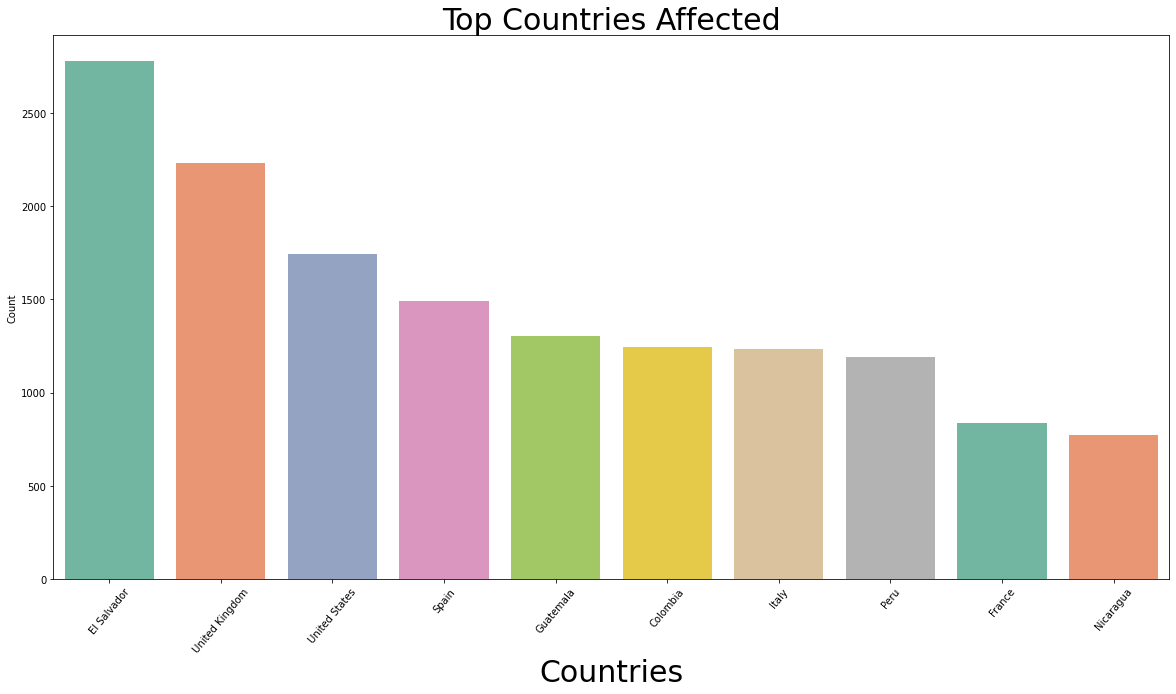

In [67]:
plt.subplots(figsize=(20,10))
sns.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values,palette='Set2')
plt.title('Top Countries Affected',fontsize=30)
plt.xlabel('Countries',fontsize=30)
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

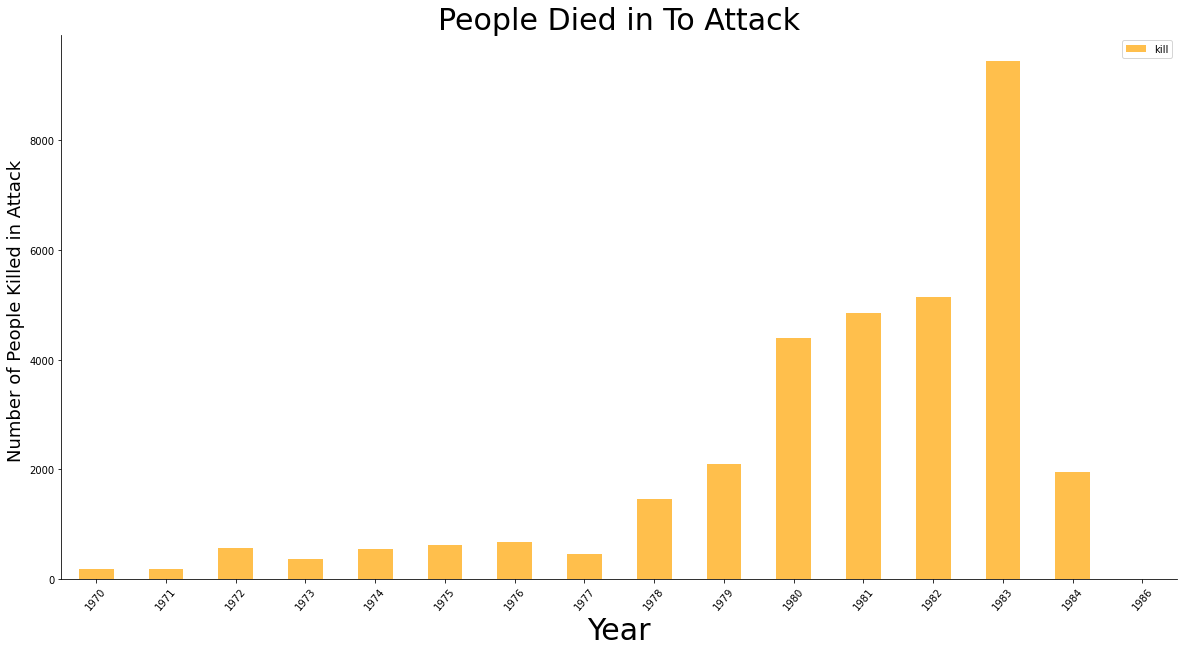

In [66]:
df = data[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df.plot(kind='bar',alpha=0.7,ax=ax4,color='orange')
plt.xticks(rotation = 50)
plt.title("People Died in To Attack",fontsize=30)
plt.xlabel('Year',fontsize=30)
plt.ylabel("Number of People Killed in Attack ",fontsize=18)

top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

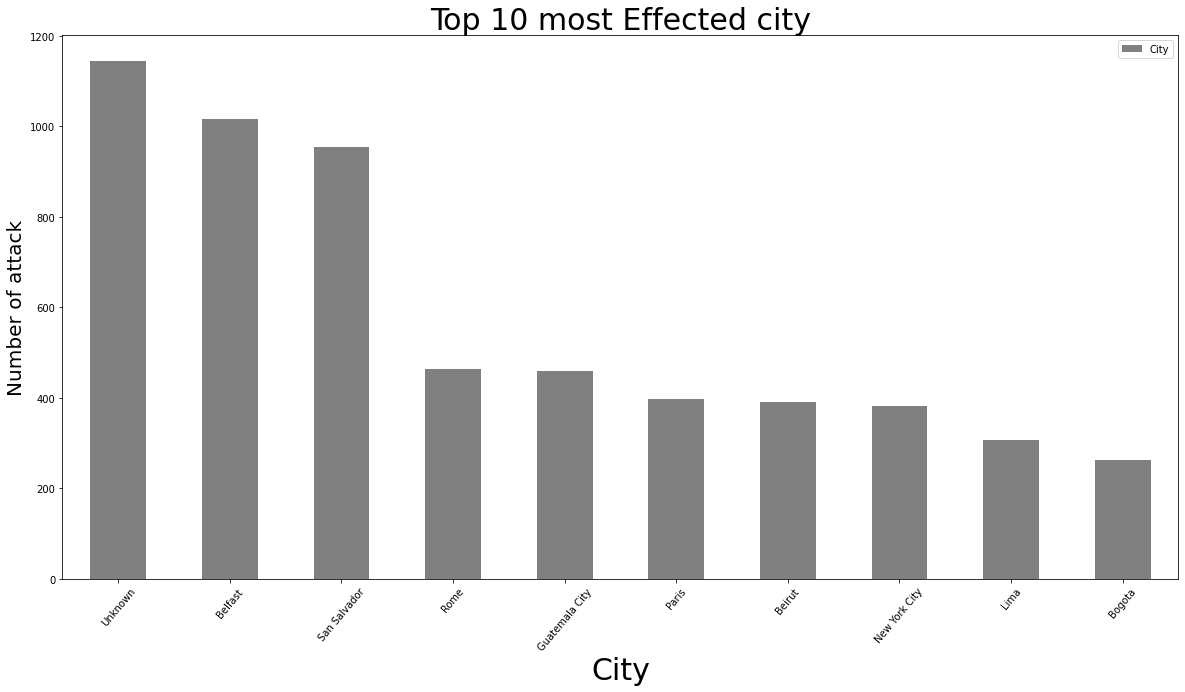

In [68]:
data['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='grey')
plt.xticks(rotation = 50)
plt.title("Top 10 most Effected city",fontsize=30)
plt.xlabel("City",fontsize=30)
plt.ylabel("Number of attack",fontsize=20)
plt.show()

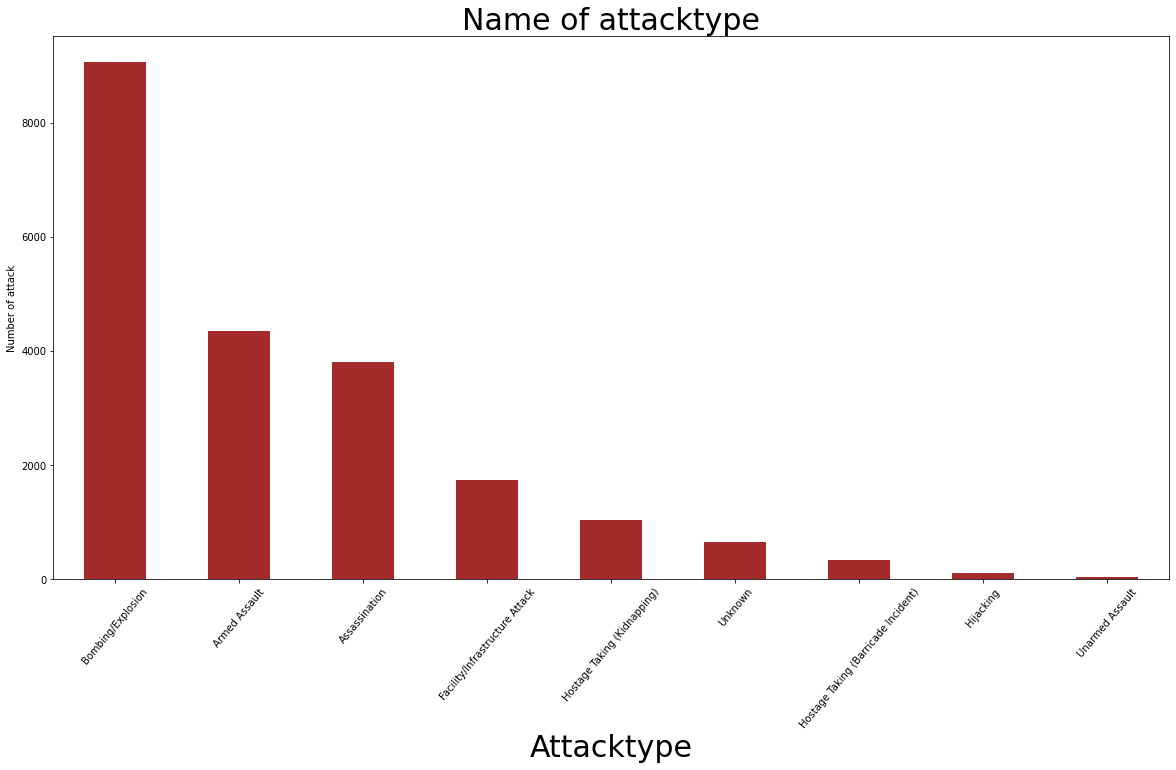

In [70]:
data['Attacktype'].value_counts().plot(kind='bar',figsize=(20,10),color='brown')
plt.xticks(rotation = 50)
plt.title("Name of attacktype",fontsize=30)
plt.xlabel("Attacktype",fontsize=30)
plt.ylabel("Number of attack",fontsize=10)
plt.show()

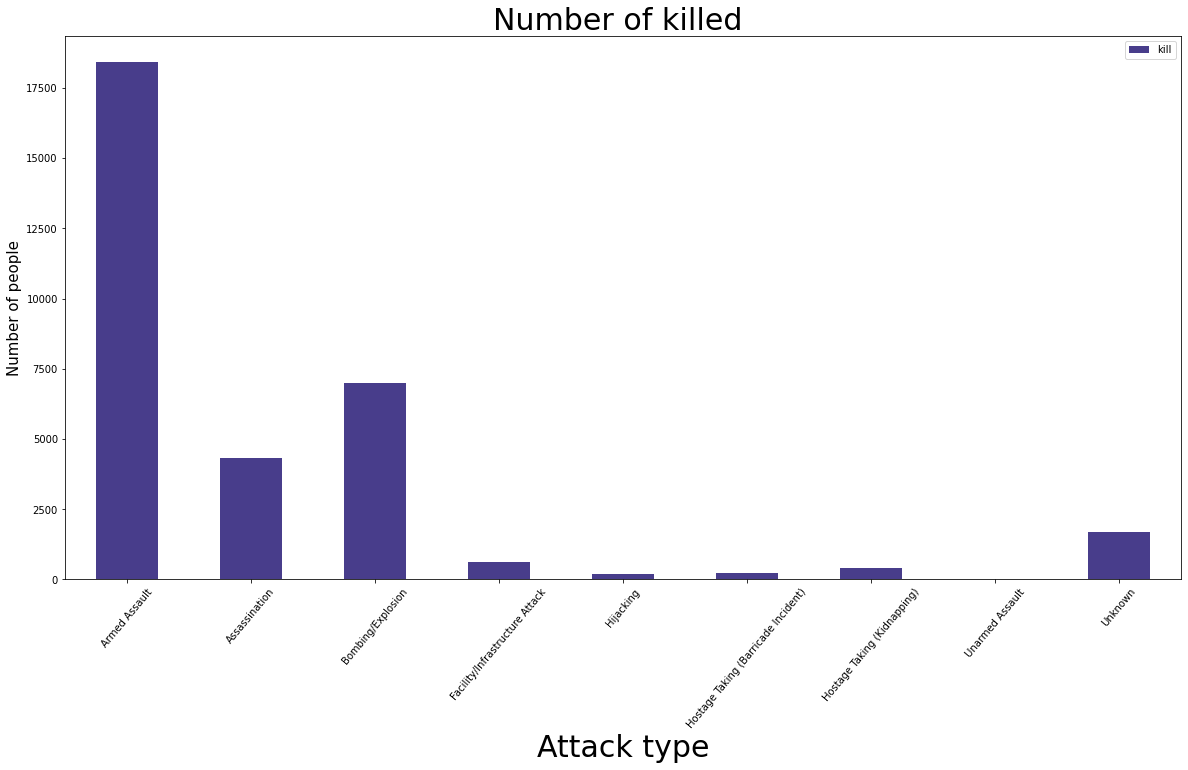

In [72]:
data[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['darkslateblue'])
plt.xticks(rotation=50)
plt.title("Number of killed ",fontsize=30)
plt.xlabel('Attack type',fontsize=30)
plt.ylabel('Number of people',fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


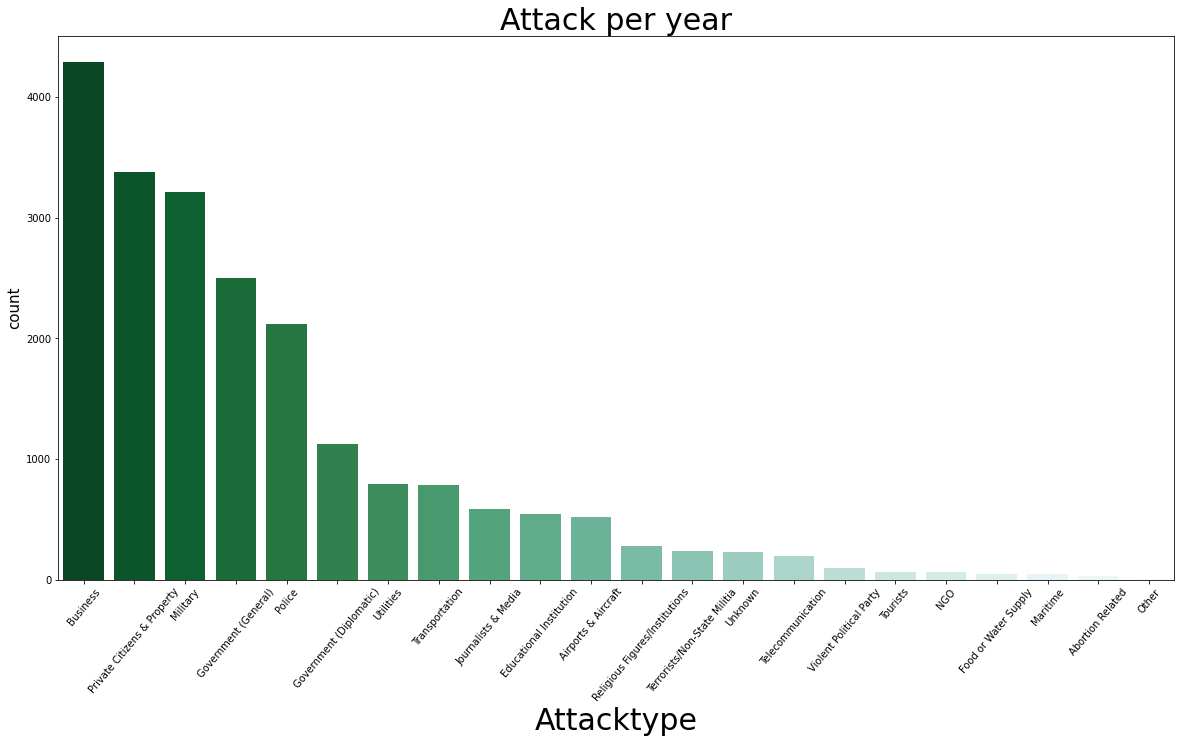

In [76]:
plt.subplots(figsize=(20,10))
sns.countplot(data["Targettype"],order=data['Targettype'].value_counts().index,palette="BuGn_r");
plt.xticks(rotation=50)
plt.title("Attack per year",fontsize=30)
plt.xlabel("Attacktype", fontsize=30)
plt.ylabel("count",fontsize=15)
plt.show()

In [77]:
df=data[['Group','Country','kill']]
df=df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Group,Country,kill
0,Farabundo Marti National Liberation Front (FMLN),El Salvador,3941.0
1,Nicaraguan Democratic Force (FDN),Nicaragua,2495.0
2,Shining Path (SL),Peru,2146.0
3,Irish Republican Army (IRA),United Kingdom,1214.0
4,Democratic Revolutionary Alliance (ARDE),Nicaragua,1206.0
5,Revolutionary Armed Forces of Colombia (FARC),Colombia,897.0
6,Guerrilla Army of the Poor (EGP),Guatemala,538.0
7,Mujahedin-e Khalq (MEK),Iran,489.0
8,Contras,Nicaragua,420.0
9,Basque Fatherland and Freedom (ETA),Spain,402.0


In [78]:
type_of_Kill = data.pivot_table(columns='Attacktype', values='kill', aggfunc='sum')
type_of_Kill

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,18430.0,4333.0,6996.0,610.0,186.0,241.0,423.0,19.0,1680.0


In [79]:
country_wise_Kill = data.pivot_table(columns='Country', values='kill', aggfunc='sum')
country_wise_Kill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Australia,Austria,Bahamas,Bahrain,...,Uruguay,Vatican City,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yugoslavia,Zaire,Zambia,Zimbabwe
kill,53.0,0.0,0.0,0.0,309.0,331.0,6.0,12.0,0.0,0.0,...,4.0,0.0,44.0,65.0,70.0,0.0,4.0,1.0,5.0,59.0
